<a href="https://colab.research.google.com/github/tylerwetrust/deep-learning/blob/main/lv4-nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('SpamDetectionData.txt')
data.iloc[:3]

,Label,Message
0,Spam,<p>But could then once pomp to nor that glee g...
1,Spam,<p>His honeyed and land vile are so and native...
2,Spam,<p>Tear womans his was by had tis her eremites...


In [26]:
x = data['Message']
y = data['Label']
x = x.str.replace('<p>','')
x = x.str.replace('</p>','')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [43]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
train_data_seq = tokenizer.texts_to_sequences(x_train)
test_data_seq = tokenizer.texts_to_sequences(x_test)
print(tokenizer.word_index) 
print(tokenizer.word_counts)

{'the': 1, 'and': 2, 'of': 3, 'a': 4, 'i': 5, 'to': 6, 'my': 7, 'that': 8, 'his': 9, 'he': 10, 'in': 11, 'this': 12, 'but': 13, 'from': 14, 'was': 15, 'door': 16, 'or': 17, 'chamber': 18, 'on': 19, 'at': 20, 'is': 21, 'nor': 22, 'by': 23, 'for': 24, 'had': 25, 'not': 26, 'bird': 27, 'raven': 28, 'with': 29, 'nevermore': 30, 'thy': 31, 'then': 32, 'it': 33, 'there': 34, 'me': 35, 'more': 36, 'lenore': 37, 'still': 38, 'so': 39, 'one': 40, 'said': 41, 'soul': 42, 'no': 43, 'name': 44, 'childe': 45, 'if': 46, 'into': 47, 'above': 48, 'before': 49, 'nothing': 50, 'what': 51, 'bust': 52, 'all': 53, 'him': 54, 'as': 55, 'be': 56, 'some': 57, 'yet': 58, 'upon': 59, 'did': 60, 'tis': 61, 'though': 62, 'only': 63, 'heart': 64, 'tapping': 65, 'word': 66, 'whom': 67, 'quoth': 68, 'sad': 69, 'than': 70, 'whose': 71, 'where': 72, 'would': 73, 'floor': 74, 'now': 75, 'harold': 76, 'her': 77, 'ah': 78, 'none': 79, 'ever': 80, 'angels': 81, 'oer': 82, 'have': 83, 'long': 84, 'thee': 85, 'its': 86, 'le

In [45]:
print(train_data_seq)

[[334, 382, 4, 1, 3, 117, 252, 2, 661, 221, 107, 416, 1, 1, 131, 52, 65, 237, 12, 1, 487, 555, 2, 68, 81, 1, 18, 719, 17, 487, 114, 730, 86, 12, 1, 176, 2, 347, 151, 367, 2, 477, 32, 2, 584, 164, 534, 5, 68, 367, 198, 220, 438, 38, 30, 1, 323, 48, 209, 217, 80, 7, 2, 126, 94, 43, 750, 438, 185, 2, 40, 152, 1, 1, 627, 1, 19, 1, 642, 34, 11, 6, 69, 734, 222, 107, 32, 7, 199, 44, 205, 48, 41, 238, 14, 147, 182, 335, 119, 628, 7, 400, 34, 30, 162, 556, 277, 4, 38, 293, 17, 2, 31, 173, 25, 6, 272, 217, 155, 109, 2, 784, 585, 53, 33, 23, 766, 89, 83, 478, 177, 89, 223, 7, 109, 383, 114, 13, 30, 735, 49, 127, 7, 224, 716, 24, 83, 123, 19, 730, 586, 12, 29, 47, 258, 264, 140, 148, 195, 159, 5, 163, 10, 23, 145, 2, 717, 5, 12, 3, 21, 57, 15, 2, 56, 48, 14, 738, 3, 520, 66, 594, 28, 50, 213, 152, 67, 764, 4, 23, 348, 86, 1, 770, 18, 42, 5, 83, 755, 30, 734, 51, 16, 29, 114, 8, 57, 8, 5, 119, 336, 53, 677, 384, 449, 8, 406, 11, 222, 173, 11, 5, 97, 7, 1, 37, 347, 195, 643, 89, 198, 7, 107, 188, 1

In [51]:
def vectorize_sequences(sequences, dimension=4000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [53]:
def vectorize_labels(labels):
  results = np.zeros(len(labels))
  for i, label in enumerate(labels):
    if (label.lower() == 'spam'):
      results[i] = 1
  return results

In [58]:
train_data_vec = vectorize_sequences(train_data_seq)
test_data_vec = vectorize_sequences(test_data_seq)

train_labels_vec = vectorize_labels(y_train)
test_labels_vec = vectorize_labels(y_test)

In [61]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(4000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [62]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_data_vec, train_labels_vec, epochs=20, batch_size=128, validation_split
=0.3).history

Epoch 1/20
11/11 [==============================] - 1s 38ms/step - loss: 0.5284 - accuracy: 0.7585 - val_loss: 0.1375 - val_accuracy: 1.0000
Epoch 2/20
11/11 [==============================] - 0s 8ms/step - loss: 0.1152 - accuracy: 1.0000 - val_loss: 0.0550 - val_accuracy: 1.0000
Epoch 3/20
11/11 [==============================] - 0s 8ms/step - loss: 0.0490 - accuracy: 1.0000 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 4/20
11/11 [==============================] - 0s 8ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 5/20
11/11 [==============================] - 0s 8ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 6/20
11/11 [==============================] - 0s 8ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 7/20
11/11 [==============================] - 0s 9ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 8/20
11/11 [=

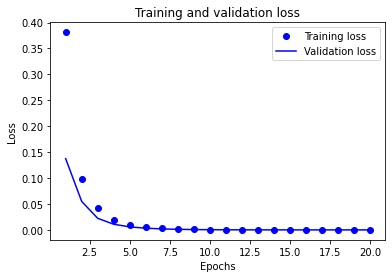

In [63]:
acc = history['accuracy']
loss_values = history['loss']
val_loss_values = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [68]:
result = model.evaluate(test_data_vec, test_labels_vec)

7/7 [==============================] - 0s 2ms/step - loss: 1.1506e-06 - accuracy: 1.0000


In [84]:
test = "Is this a spam message? lol"
seq = tokenizer.texts_to_sequences(test)
print(seq)
vec = vectorize_sequences(seq)
print(vec)

[[5], [], [], [], [], [5], [], [], [4], [], [], [], [4], [], [], [], [], [], [], [4], [], [], [], [], [], [], []]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [83]:
model.predict(vec)

array([[0.51492816],
       [0.58210456],
       [0.58210456],
       [0.58210456],
       [0.58210456],
       [0.51492816],
       [0.58210456],
       [0.58210456],
       [0.6022124 ],
       [0.58210456],
       [0.58210456],
       [0.58210456],
       [0.6022124 ],
       [0.58210456],
       [0.58210456],
       [0.58210456],
       [0.58210456],
       [0.58210456],
       [0.58210456],
       [0.6022124 ],
       [0.58210456],
       [0.58210456],
       [0.58210456],
       [0.58210456],
       [0.58210456],
       [0.58210456],
       [0.58210456]], dtype=float32)